In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection as  model_selection

In [5]:
#load the iris dataset from sklearn
from sklearn.datasets import load_iris
import pandas as pd

In [7]:
iris = load_iris(as_frame=True)
iris.data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [8]:
iris.target.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: target, dtype: int32

In [9]:
iris.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


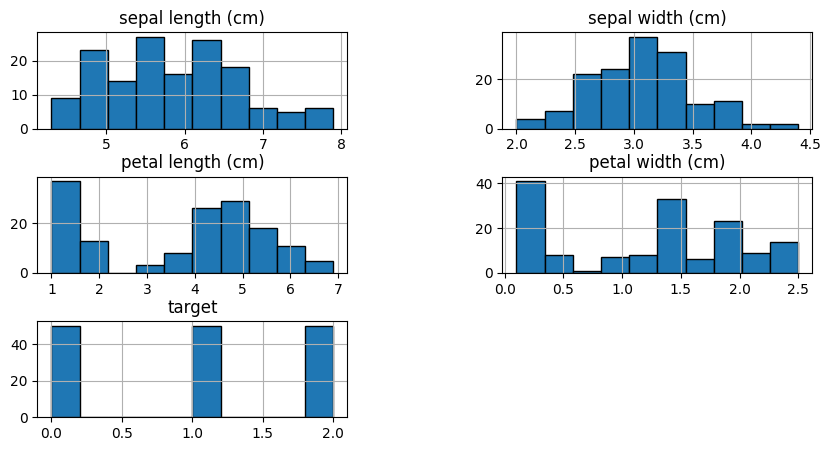

In [14]:
#visualize the data
iris.frame.hist(figsize=(10,5),bins = 10, edgecolor='black')
plt.subplots_adjust(hspace=0.5, wspace=0.5)

In [15]:
#describe the features
iris.frame.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [16]:
selected_features = iris.data[['sepal length (cm)', 'petal length (cm)']]


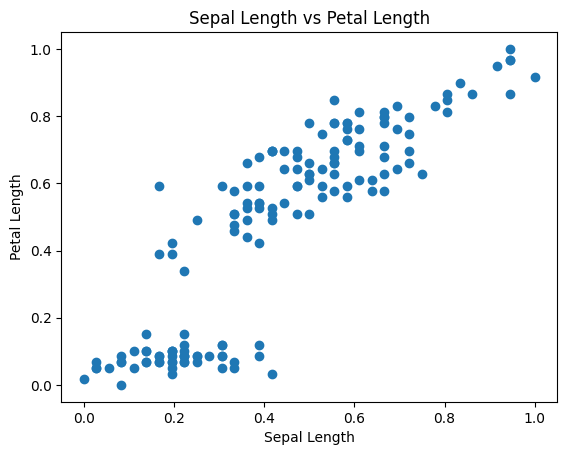

In [17]:
#apply min max scaling to the selected features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
selected_features = scaler.fit_transform(selected_features)

#Visualize the scaled features
plt.scatter(selected_features[:,0], selected_features[:,1])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Sepal Length vs Petal Length')
plt.show()


### 1. **Min-Max Scaling (MinMaxScaler)**
- **Purpose**: Rescales the data to a fixed range, typically [0, 1].
- **How It Works**: 

  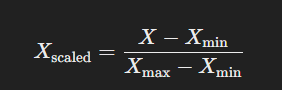
  
  Where Xmin and Xmax are the minimum and maximum values of the feature, respectively.
- **Pros**: 
  - Keeps all features in a consistent scale.
  - Useful when you need to maintain relationships between data points.
- **Cons**:
  - Sensitive to outliers, as the min and max values can be skewed by extreme values.
- **When to Use**: Best for algorithms that assume data is in a specific range, like neural networks or when dealing with image data.

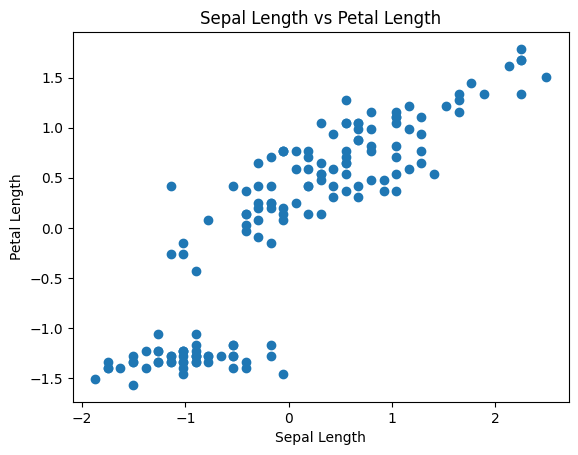

In [18]:
#Apply standard scaling to the selected features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
selected_features = scaler.fit_transform(selected_features)

#Visualize the scaled features
plt.scatter(selected_features[:,0], selected_features[:,1])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Sepal Length vs Petal Length')
plt.show()


### 2. **Standard Scaling (StandardScaler)**
- **Purpose**: Standardizes features by removing the mean and scaling to unit variance.
- **How It Works**: 
  
  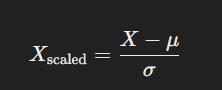
  
  Where \(\mu\) is the mean and \(\sigma\) is the standard deviation.
- **Pros**: 
  - Centers the data around zero with a standard deviation of one.
  - Less sensitive to outliers compared to Min-Max Scaling.
- **Cons**: 
  - Still influenced by outliers, though less so than Min-Max.
- **When to Use**: Best for algorithms that assume normally distributed data, such as linear regression or logistic regression.

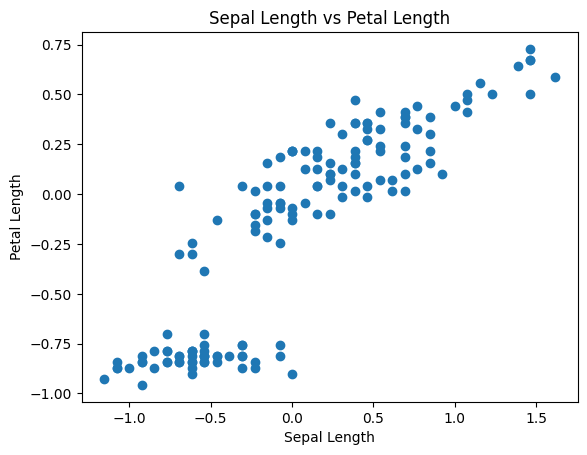

In [19]:
#Apply robust scaling to the selected features
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
selected_features = scaler.fit_transform(selected_features)

#Visualize the scaled features
plt.scatter(selected_features[:,0], selected_features[:,1])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Sepal Length vs Petal Length')
plt.show()


### 3. **Robust Scaling (RobustScaler)**
- **Purpose**: Scales data using statistics that are robust to outliers.
- **How It Works**: 
  
  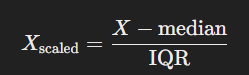
  
  Where the median is subtracted and scaled by the interquartile range (IQR, i.e., the range between the 25th and 75th percentiles).
- **Pros**: 
  - Robust to outliers, making it suitable for data with extreme values.
- **Cons**: 
  - Doesn't scale the data into a specific range.
  - May not perform well if the data isn't skewed by outliers.
- **When to Use**: Ideal when dealing with data containing outliers.


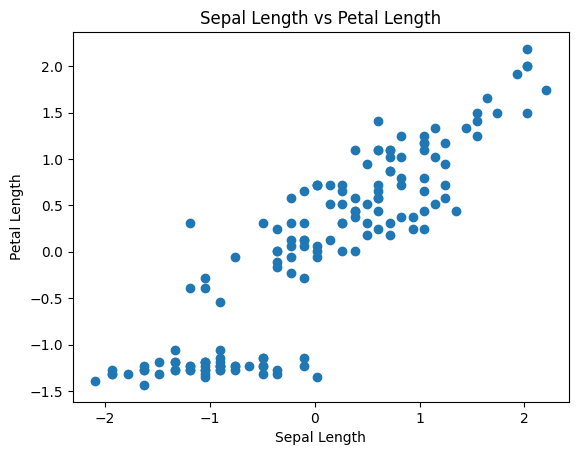

In [20]:
#apply power transformation to the selected features
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()
selected_features = scaler.fit_transform(selected_features)

#Visualize the scaled features
plt.scatter(selected_features[:,0], selected_features[:,1])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Sepal Length vs Petal Length')
plt.show()


### 4. **Power Transformer**
- **Purpose**: Applies a power transformation to make data more Gaussian-like.
- **How It Works**:
  - There are two common power transformations: **Box-Cox** and **Yeo-Johnson**.
  - **Box-Cox** requires the data to be strictly positive, while **Yeo-Johnson** can handle both positive and negative data.
  - The transformation is applied to stabilize variance, minimize skewness, and make the data more normally distributed.
- **Pros**: 
  - Makes data more symmetric and less skewed.
  - Can improve the performance of algorithms sensitive to non-normality (e.g., linear models).
- **Cons**: 
  - Not interpretable as a simple scaling.
  - Requires parameter tuning (finding the optimal lambda value).
- **When to Use**: Best when data is highly skewed or when algorithms benefit from normally distributed data.

### Summary:
- **Min-Max Scaling**: Best for data with no outliers when a specific range is needed.
- **Standard Scaling**: General-purpose, good for normally distributed data.
- **Robust Scaling**: Best for data with outliers.
- **Power Transformer**: Best for highly skewed data, making it more normally distributed.